# Decision Tree to Diagnose Heart Disease

## Step 1: Load the libraries 

In [1]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot fordata plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# from utilities import visualize_classifier

import numpy as np

import graphviz

from sklearn.ensemble import RandomForestClassifier

## Step 2: Load a Dataset

Use pandas to load the data from file processed.cleveland.data<br>
It is a table data in csv format.<br>
Columns contain the size of the leaves of various iris flowers. <br>
Specify the names of each column before loading the data.<br>
Create a dataset object.

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"
names = ['age','sex','cp','bps','chol','fbs','ecg','hrate','ang','peak','slp','ca','thal','diag']
dataset = pandas.read_csv(url, names=names, na_values=["?"])

## Step 3: Get to Know Your Data

Investigate the dataset. <br>
Find out how many records are available, are they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [3]:
# See the shape (number of rows) and size (number of columns)
print(dataset.shape)

(303, 14)


In [4]:
# Clean the data
np.nan_to_num(dataset)
# dataset = dataset[isnan(dataset)]
dataset[dataset.notnull()]
dataset = dataset.dropna()

In [5]:
# See how it looks (get the first 20 records)
print(dataset.head(20))

     age  sex   cp    bps   chol  fbs  ecg  hrate  ang  peak  slp   ca  thal  \
0   63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0   2.3  3.0  0.0   6.0   
1   67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0   1.5  2.0  3.0   3.0   
2   67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0   2.6  2.0  2.0   7.0   
3   37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0   3.5  3.0  0.0   3.0   
4   41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0   1.4  1.0  0.0   3.0   
5   56.0  1.0  2.0  120.0  236.0  0.0  0.0  178.0  0.0   0.8  1.0  0.0   3.0   
6   62.0  0.0  4.0  140.0  268.0  0.0  2.0  160.0  0.0   3.6  3.0  2.0   3.0   
7   57.0  0.0  4.0  120.0  354.0  0.0  0.0  163.0  1.0   0.6  1.0  0.0   3.0   
8   63.0  1.0  4.0  130.0  254.0  0.0  2.0  147.0  0.0   1.4  2.0  1.0   7.0   
9   53.0  1.0  4.0  140.0  203.0  1.0  2.0  155.0  1.0   3.1  3.0  0.0   7.0   
10  57.0  1.0  4.0  140.0  192.0  0.0  0.0  148.0  0.0   0.4  2.0  0.0   6.0   
11  56.0  0.0  2.0  140.0  294.0  0.0  2

In [6]:
# See how many classes are included and how many records per class are distributed
# Group by class attribute diag
print(dataset.groupby('diag').size())

diag
0    160
1     54
2     35
3     35
4     13
dtype: int64


In [7]:
# Have the descriptive statistics calculated for the whole dataset
print(dataset.describe())

              age         sex          cp         bps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

              ecg       hrate         ang        peak         slp          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

## Step 4: Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plot

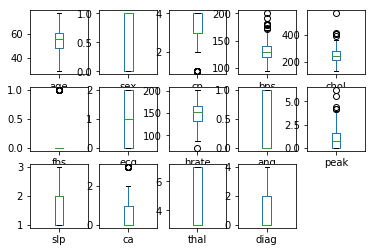

In [8]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

See explanation of the box-whisker diagram
!["Explanation of box-whisker"](images/boxwhisker.gif "What does it mean?")

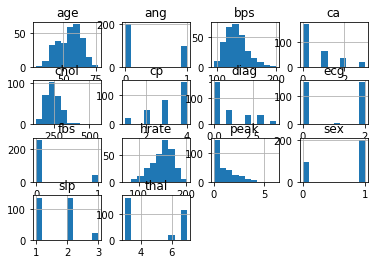

In [9]:
# Draw histograms
dataset.hist()
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Some of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

In [10]:
# Convert the dataset into array
array = dataset.values

# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [11]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

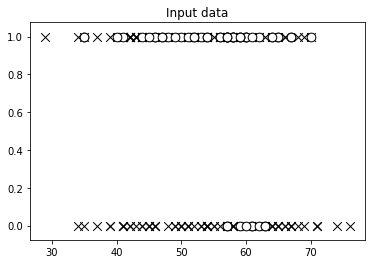

In [12]:
# Visualize input data
plt.figure()
plt.scatter(class0[:, 0], class0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class1[:, 0], class1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')
plt.show()

## Step 5: Training
Time to try to train a model
1. Split the dataset into two: training set and test set
2. Build the classifier by implementing Decision Tree algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [13]:
# Split the dataset into into training and testing sets inproportion 8:2: 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.4

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [14]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# visualize_classifier(classifier, X_train, y_train, 'Training dataset')
# visualize_classifier(classifier, X_test, y_test, 'Test dataset')

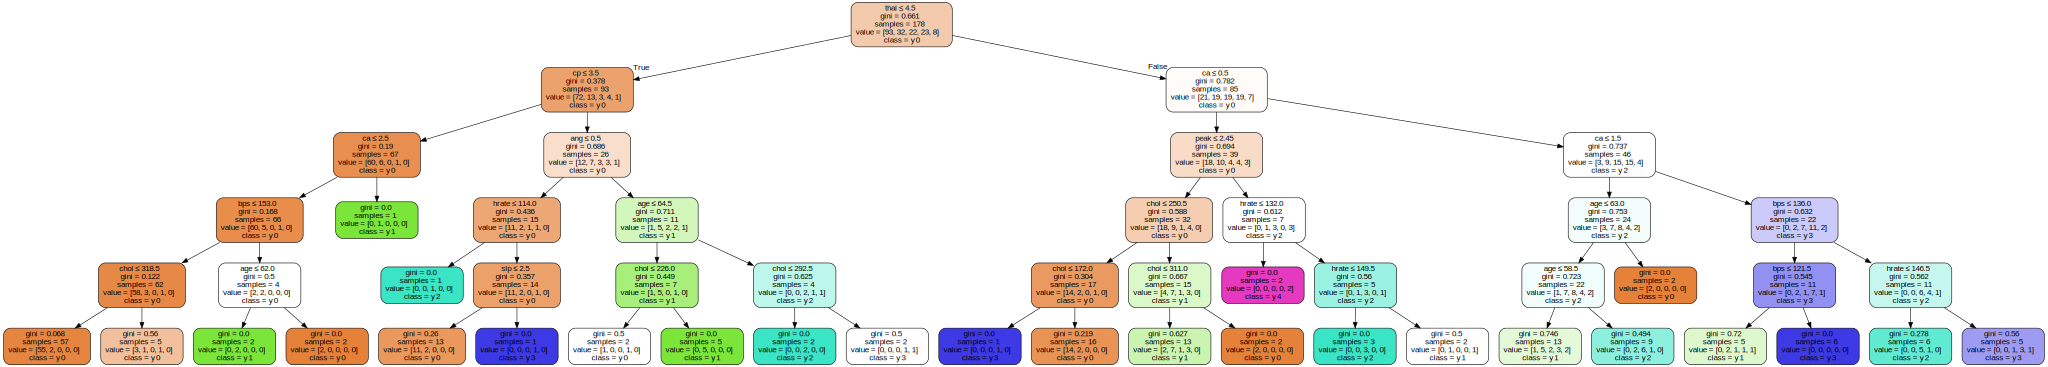

In [16]:
# draw tree from the trained data by graphviz package
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=dataset.columns[:13],                         
                         class_names = True,        
                         filled=True, rounded=True,
                         proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

# result saved in heart.pdf
graph.render("heart") 

# show it here
graph 

## Step 6. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [17]:
# Set the metrics
scoring = 'accuracy'

Now we can try to implement the model on our validation set.


In [18]:
# Predict the labels of test data
y_testp = classifier.predict(X_test)
 	
# Calculated accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp)*100)

Accuracy is  53.78151260504202


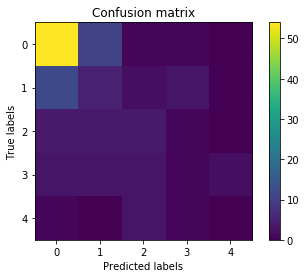

In [19]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [20]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

![image.png](attachment:image.png)     

In [21]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
print(confusion_matrix(y_testp, y_test))

[[54 12  4  3  1]
 [11  5  4  3  0]
 [ 1  2  4  3  3]
 [ 1  3  1  1  1]
 [ 0  0  0  2  0]]


In [22]:
class_names = ['Class0', 'Class1', 'Class2','Class3', 'Class4']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       0.91      0.97      0.94        93
      Class1       0.56      0.72      0.63        32
      Class2       0.81      0.77      0.79        22
      Class3       0.80      0.52      0.63        23
      Class4       1.00      0.25      0.40         8

   micro avg       0.81      0.81      0.81       178
   macro avg       0.82      0.65      0.68       178
weighted avg       0.82      0.81      0.80       178



!["A measure for comparison of solutions"](images/Fmeasure.png "What does it mean?")

<div style="width: 350px;">![""](images/confmatrix.png "What does it mean?")</div>
<div style="width: 350px;">![""](images/accuracy.png) "What does it mean?")</div>
http://www.alivelearn.net/?p=898

In [23]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       0.73      0.81      0.77        67
      Class1       0.22      0.23      0.22        22
      Class2       0.31      0.31      0.31        13
      Class3       0.14      0.08      0.11        12
      Class4       0.00      0.00      0.00         5

   micro avg       0.54      0.54      0.54       119
   macro avg       0.28      0.28      0.28       119
weighted avg       0.50      0.54      0.52       119



## <span style="color:red">Task</span>
Make a Google search for method Random Forest provided in sklearn.<br>
Repeat the training, testing and validation.<br>
Compare the Decision Tree and Random Forest.
Upload the answer to the question: Which method gives better results?
Apply the prove.

In [28]:
params = {'max_depth': 5}
classifier = RandomForestClassifier(**params)
classifier.fit(X_train, y_train)

C:\Users\marti\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)